In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import asyncio
import numpy as np


LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

In [31]:
# Connect to the Artemis Device
ble.connect()

2022-04-14 17:48:09,297 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:A5:6D:02:3C
2022-04-14 17:48:13,938 | INFO     |: Connected to C0:83:A5:6D:02:3C


In [32]:
# Instantiate RobotControl class (in controller.py)
from controller import *
rc = RobotControl(ble)

In [33]:
# Start spinning!
rc.spin_360()

In [34]:
# Make sure to call this after the spin motion stops. This terminates data collection.
rc.stop_recording()

In [43]:
# Collect & display the full sensor data
cols = [
    "time", "dist_r", "dist_f", "acc_x", "acc_y", "acc_z", "gyr_x",
    "gyr_y", "gyr_z", "mag_x", "mag_y", "mag_z", "temp"
]
sensor_data = pd.DataFrame(rc.sensor_arr, columns=cols)

In [44]:
sensor_data

,time,dist_r,dist_f,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,temp
0,22.326,546.0,751.0,-979.492,-171.875,67.871,0.122,1.816,0.961,-395.850,-466.649,307.490,27.790
1,22.941,431.0,742.0,-979.980,-180.664,81.542,0.389,0.122,-2.190,-401.850,-460.500,323.250,27.885
2,23.556,583.0,961.0,-981.445,-173.339,85.937,-1.152,2.816,0.908,-404.399,-454.500,337.799,27.790
3,24.201,632.0,766.0,-983.398,-173.828,89.843,1.702,3.511,0.229,-407.850,-427.490,346.500,27.694
4,24.816,320.0,688.0,-986.328,-179.687,81.540,0.910,3.465,0.990,-406.799,-415.490,344.399,28.290
5,25.446,305.0,904.0,-974.609,-174.316,91.308,0.358,0.824,0.610,-405.299,-391.950,329.100,27.550
6,26.061,291.0,753.0,-973.632,-161.132,87.890,0.404,-1.839,0.910,-409.350,-403.350,326.250,27.502
7,26.691,313.0,658.0,-985.351,-173.828,104.492,0.549,0.830,1.519,-401.549,-409.500,315.450,27.694
8,27.321,558.0,2633.0,-985.351,-159.179,94.726,-1.404,-1.748,2.412,-400.200,-396.450,301.649,27.981
9,27.951,645.0,1837.0,-982.421,-164.550,78.613,-1.519,-1.206,0.961,-398.250,-411.000,292.649,27.790


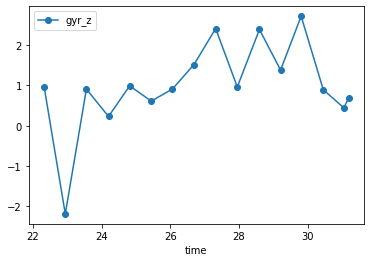

In [46]:
# Currently, only configured to plot the "gyr_z" values
plot_sensor_data(rc.sensor_arr)

In [48]:
# This is where we do the polar plot stuff...
import math
from matplotlib import pyplot as plt

Actual number of data points (including the excluded latter points collected after spin stopped): 16

Important data:
Time: [22.326, 22.941, 23.556, 24.201, 24.816, 25.446, 26.061, 26.691, 27.321, 27.951, 28.596, 29.211, 29.811, 30.456, 31.056]
Distance: [751.0, 742.0, 961.0, 766.0, 688.0, 904.0, 753.0, 658.0, 2633.0, 1837.0, 3043.0, 875.0, 902.0, 843.0, 713.0]
['Angle: 0.00', 'Angle: 0.47', 'Angle: 0.94', 'Angle: 1.41', 'Angle: 1.88', 'Angle: 2.36', 'Angle: 2.83', 'Angle: 3.30', 'Angle: 3.77', 'Angle: 4.24', 'Angle: 4.71', 'Angle: 5.18', 'Angle: 5.65', 'Angle: 6.13', 'Angle: 6.60']


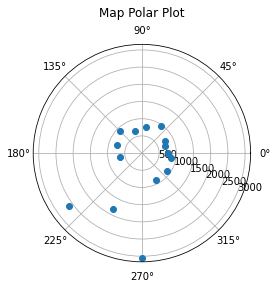

In [57]:
times = list(sensor_data["time"][:15])
tofs = sensor_data["dist_f"][:15]
ang_vels = list(sensor_data["gyr_z"])
# ang_vels = list(np.tile(np.array([22.5]), len(tofs)))
num_points = len(ang_vels)

# thetas = [0]
# for i in range(1, num_points):
#     thetas.append(thetas[i-1] + math.radians(ang_vels[i] * (times[i] - times[i-1])))
thetas = np.linspace(0, 2.1 * np.pi, len(tofs))

xs = np.cos(thetas) * tofs
ys = np.sin(thetas) * tofs

r = np.array(tofs)
theta = np.array(thetas)

print(f"Actual number of data points (including the excluded latter points collected after spin stopped): {num_points}\n")

print("Important data:")
print(f"Time: {repr(times)}")
print(f"Distance: {repr(list(r))}")
print("Angle:"["{:0.2f}".format(x) for x in theta ])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o')
# ax.set_rmax(2000)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Map Polar Plot", va='bottom')
plt.show()

In [26]:
ble.disconnect()

2022-03-23 15:06:07,951 | INFO     |: Disconnected from 52193D96-8201-1734-7C37-789D2C19BBD9
